In [33]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as m

# Crecimiento exponencial

In [34]:
# Calcula el logaritmo de una serie
def logaritmo(x):
    respuesta=[]
    for i in x:
        if(i>0):
            respuesta.append(m.log(i,2))
        else:
            respuesta.append(0)
    return respuesta

In [35]:
# Calcula la tasa de crecimiento de una serie
def tasaCrecimiento(x):
    respuesta=[]
    delta=0
    for i in x:
        if(i>0):
            respuesta.append(round((2**(m.log(i,2)-delta)-1)*100,2))
            delta=m.log(i,2)
        else:
            respuesta.append(round((2**(0-delta)-1)*100,2))
            delta=0
    return respuesta

In [36]:
# Calcula la tasa de crecimiento de una serie
def diasDuplicar(x):
    respuesta=[]
    delta=0
    for i in x:
        if(i>0):
            if((m.log(i,2)-delta)==0):
                respuesta.append(-1)
            else:
                respuesta.append(round(1/(m.log(i,2)-delta),2))
            delta=m.log(i,2)
        else:
            if (0-delta == 0):
                respuesta.append(-1)
            else:
                respuesta.append(round(1/(0-delta),2))
            delta=0
    return respuesta

In [37]:
def delta(x):
    respuesta=[]
    delta=0
    for i in x:
        respuesta.append(i-delta)
        delta=i
    return respuesta

Supongamos una serie que crece exponencialmente doblando el valor en cada interacción, y otra que lo triplica

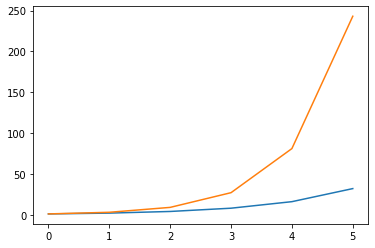

In [38]:
x=range(0,20)
y2=[2**i for i in x]
y3=[3**i for i in x]
plt.plot(x[:6],y2[:6],x[:6],y3[:6])

La representacion logaritmica en base 2 nos mostrara que cuando la tasa se duplica la pendiente es uno (log(2)) y cuando se tripilca es log(3) 

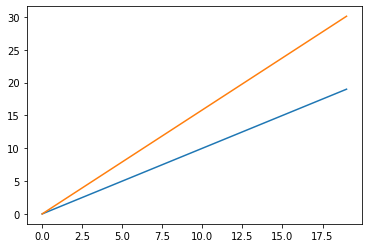

In [39]:
plt.plot(x,logaritmo(y2),x,logaritmo(y3))

In [40]:
print("La pendiente cuando se triplica el numero de infectados es {}".format(m.log(3,2)))

La pendiente cuando se triplica el numero de infectados es 1.5849625007211563


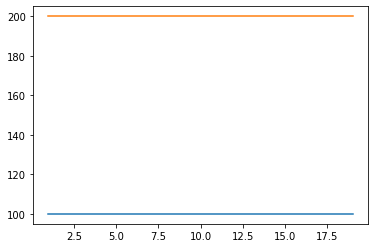

In [41]:
plt.plot(x[1:],tasaCrecimiento(y2[1:]),x[1:],tasaCrecimiento(y3[1:]))

# Datos del Corona Virus

Carga los datos de infecciones, fallecidos y curados

In [42]:
casos = pd.read_csv('D:\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv')

In [43]:
muertes = pd.read_csv('D:\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_global.csv')

In [44]:
curados = pd.read_csv('D:\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv')

In [45]:
esp=casos[casos['Country/Region']=='Spain'].loc[:,'1/22/20':].T
ita=casos[casos['Country/Region']=='Italy'].loc[:,'1/22/20':].T
aut=casos[casos['Country/Region']=='Austria'].loc[:,'1/22/20':].T
ger=casos[casos['Country/Region']=='Germany'].loc[:,'1/22/20':].T
usa=casos[casos['Country/Region']=='US'].loc[:,'1/22/20':].T
fra=casos[(casos['Country/Region']=='France') & (pd.isnull(casos['Province/State']))].loc[:,'1/22/20':].T
uk=casos[(casos['Country/Region']=='United Kingdom') & (pd.isnull(casos['Province/State']))].loc[:,'1/22/20':].T

In [46]:
total_casos = pd.DataFrame({'España':esp[esp.columns[0]],'Francia':fra[fra.columns[0]],'EEUU':usa[usa.columns[0]],'Alemania':ger[ger.columns[0]],'Italia':ita[ita.columns[0]],'Austria':aut[aut.columns[0]],'UK':uk[uk.columns[0]],})

In [47]:
total_casos.tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,141942,109069,396223,107663,135586,12639,55242
4/8/20,148220,112950,429052,113296,139422,12942,60733
4/9/20,153222,117749,461437,118181,143626,13244,65077
4/10/20,158273,124869,496535,122171,147577,13555,73758
4/11/20,163027,129654,526396,124908,152271,13806,78991


In [48]:
esp=muertes[muertes['Country/Region']=='Spain'].loc[:,'1/22/20':].T
ita=muertes[muertes['Country/Region']=='Italy'].loc[:,'1/22/20':].T
aut=muertes[muertes['Country/Region']=='Austria'].loc[:,'1/22/20':].T
ger=muertes[muertes['Country/Region']=='Germany'].loc[:,'1/22/20':].T
usa=muertes[muertes['Country/Region']=='US'].loc[:,'1/22/20':].T
fra=muertes[(muertes['Country/Region']=='France') & (pd.isnull(muertes['Province/State']))].loc[:,'1/22/20':].T
uk=muertes[(muertes['Country/Region']=='United Kingdom') & (pd.isnull(muertes['Province/State']))].loc[:,'1/22/20':].T


In [49]:
total_muertes = pd.DataFrame({'España':esp[esp.columns[0]],'Francia':fra[fra.columns[0]],'EEUU':usa[usa.columns[0]],'Alemania':ger[ger.columns[0]],'Italia':ita[ita.columns[0]],'Austria':aut[aut.columns[0]],'UK':uk[uk.columns[0]],})

In [50]:
total_muertes.tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,14045,10328,12722,2016,17127,243,6159
4/8/20,14792,10869,14695,2349,17669,273,7097
4/9/20,15447,12210,16478,2607,18279,295,7978
4/10/20,16081,13197,18586,2767,18849,319,8958
4/11/20,16606,13832,20463,2736,19468,337,9875


In [51]:
esp=curados[curados['Country/Region']=='Spain'].loc[:,'1/22/20':].T
ita=curados[curados['Country/Region']=='Italy'].loc[:,'1/22/20':].T
aut=curados[curados['Country/Region']=='Austria'].loc[:,'1/22/20':].T
ger=curados[curados['Country/Region']=='Germany'].loc[:,'1/22/20':].T
usa=curados[curados['Country/Region']=='US'].loc[:,'1/22/20':].T
fra=curados[(curados['Country/Region']=='France') & (pd.isnull(curados['Province/State']))].loc[:,'1/22/20':].T
uk=curados[(curados['Country/Region']=='United Kingdom') & (pd.isnull(curados['Province/State']))].loc[:,'1/22/20':].T

In [52]:
total_curados = pd.DataFrame({'España':esp[esp.columns[0]],'Francia':fra[fra.columns[0]],'EEUU':usa[usa.columns[0]],'Alemania':ger[ger.columns[0]],'Italia':ita[ita.columns[0]],'Austria':aut[aut.columns[0]],'UK':uk[uk.columns[0]],})

In [53]:
total_curados.tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,43208,19337,21763,36081,24392,4046,135
4/8/20,48021,21254,23559,46300,26491,4512,135
4/9/20,52165,23206,25410,52407,28470,5240,135
4/10/20,55668,24932,28790,53913,30455,6064,344
4/11/20,59109,26391,31270,57400,32534,6604,344


In [54]:
%matplotlib inline

# Total de Casos

Evolución diaria del número de casos

In [75]:
total_casos.tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,141942,109069,396223,107663,135586,12639,55242
4/8/20,148220,112950,429052,113296,139422,12942,60733
4/9/20,153222,117749,461437,118181,143626,13244,65077
4/10/20,158273,124869,496535,122171,147577,13555,73758
4/11/20,163027,129654,526396,124908,152271,13806,78991


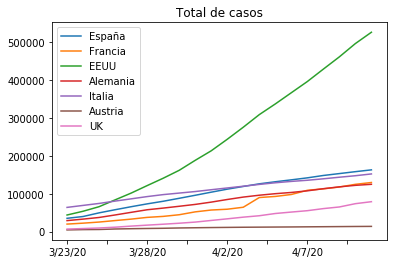

In [55]:
total_casos[-20:].plot(title="Total de casos")

Vemos el total en escala logaritmica. Nos da una idea de cuan exponencial es el crecimiento:

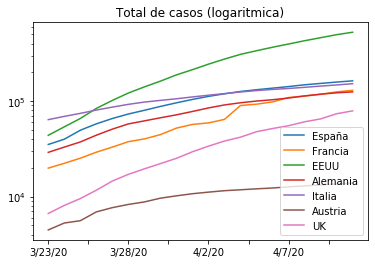

In [56]:
total_casos[-20:].plot(title="Total de casos (logaritmica)", logy=True)

In [57]:
#total_casos.apply(np.log)

In [58]:
#total_casos.apply(lambda x : [ m.log(i,2) if i>0 else 0 for i in x])

Con la escala logaritmica podemos ver las tasas de crecimiento. Las diferencias parecen insignificantes, pero cada decimal pesa mucho, porque es la base del exponente de crecimiento. Por ejemplo, veamos los datos en los últimos cinco días:

In [59]:
total_casos.apply(tasaCrecimiento).tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,3.85,11.28,8.06,4.15,2.29,2.78,7.04
4/8/20,4.42,3.56,8.29,5.23,2.83,2.40,9.94
4/9/20,3.37,4.25,7.55,4.31,3.02,2.33,7.15
4/10/20,3.30,6.05,7.61,3.38,2.75,2.35,13.34
4/11/20,3.00,3.83,6.01,2.24,3.18,1.85,7.09


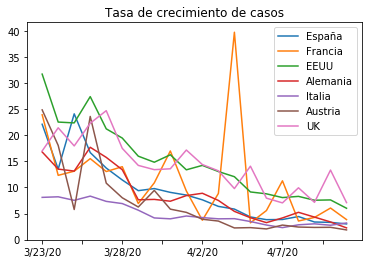

In [60]:
total_casos.apply(tasaCrecimiento)[-20:].plot(title="Tasa de crecimiento de casos")

Esto se traduce en el número de días que se necesitan para duplicar el número de casos. Vemos como las pequeñas diferencias que veiamos antes en las tasas, cuando las expresamos en días:

In [61]:
total_casos.apply(diasDuplicar).tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,18.33,6.48,8.94,17.05,30.58,25.27,10.19
4/8/20,16.02,19.82,8.71,13.59,24.84,29.26,7.31
4/9/20,20.88,16.66,9.53,16.42,23.33,30.05,10.03
4/10/20,21.37,11.81,9.46,20.88,25.54,29.86,5.54
4/11/20,23.42,18.43,11.87,31.29,22.14,37.78,10.11


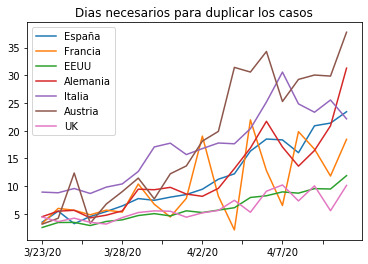

In [62]:
total_casos.apply(diasDuplicar)[-20:].plot(title="Dias necesarios para duplicar los casos")

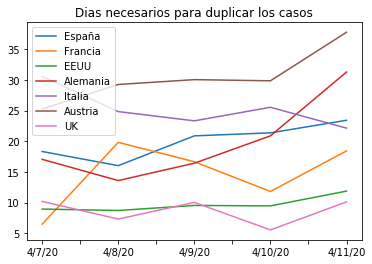

In [63]:
total_casos.apply(diasDuplicar)[-5:].plot(title="Dias necesarios para duplicar los casos")

# Fallecidos

In [64]:
total_muertes[-4:].apply(delta).tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/8/20,14792,10869,14695,2349,17669,273,7097
4/9/20,655,1341,1783,258,610,22,881
4/10/20,634,987,2108,160,570,24,980
4/11/20,525,635,1877,-31,619,18,917


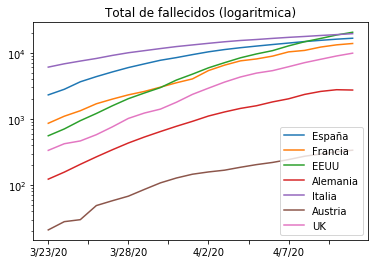

In [65]:
total_muertes[-20:].plot(title="Total de fallecidos (logaritmica)", logy=True)

In [67]:
print("Valor máximo de fallecidos es {}".format(max(total_muertes.apply(delta)['España'])))

Valor máximo de fallecidos es 961


In [68]:
print("Valor mínimo de fallecidos en los últimos quince dias {}".format(min(total_muertes.apply(delta)['España'][-15:])))

Valor mínimo de fallecidos en los últimos quince dias 525


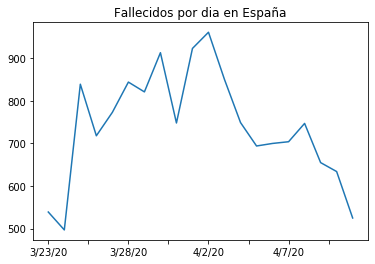

In [69]:
total_muertes.apply(delta)['España'][-20:].plot(title="Fallecidos por dia en España")

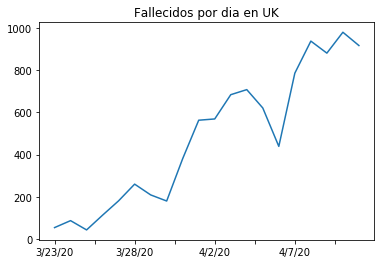

In [70]:
total_muertes.apply(delta)['UK'][-20:].plot(title="Fallecidos por dia en UK")

# Balance de Ingresos y Salidas

In [76]:
total_casos.apply(delta).tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,5267,11059,29556,4289,3039,342,3634
4/8/20,6278,3881,32829,5633,3836,303,5491
4/9/20,5002,4799,32385,4885,4204,302,4344
4/10/20,5051,7120,35098,3990,3951,311,8681
4/11/20,4754,4785,29861,2737,4694,251,5233


In [77]:
total_curados.apply(delta).tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,2771,2087,2182,7381,1555,583,0
4/8/20,4813,1917,1796,10219,2099,466,0
4/9/20,4144,1952,1851,6107,1979,728,0
4/10/20,3503,1726,3380,1506,1985,824,209
4/11/20,3441,1459,2480,3487,2079,540,0


In [78]:
(total_casos-total_muertes-total_curados)[-20:].tail()

,España,Francia,EEUU,Alemania,Italia,Austria,UK
4/7/20,84689,79404,361738,69566,94067,8350,48948
4/8/20,85407,80827,390798,64647,95262,8157,53501
4/9/20,85610,82333,419549,63167,96877,7709,56964
4/10/20,86524,86740,449159,65491,98273,7172,64456
4/11/20,87312,89431,474663,64772,100269,6865,68772


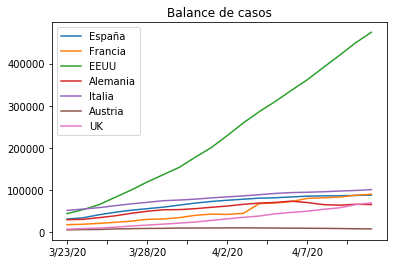

In [71]:
(total_casos-total_muertes-total_curados)[-20:].plot(title="Balance de casos")

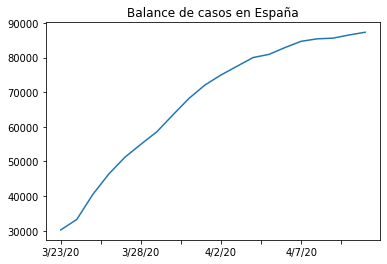

In [72]:
(total_casos-total_muertes-total_curados)['España'][-20:].plot(title="Balance de casos en España")

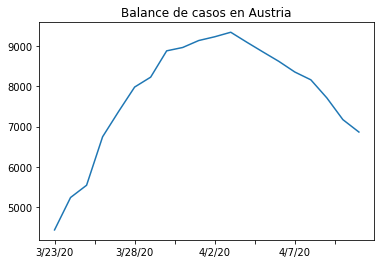

In [73]:
(total_casos-total_muertes-total_curados)['Austria'][-20:].plot(title="Balance de casos en Austria")

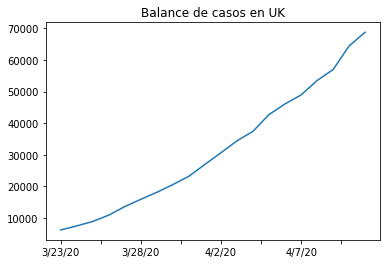

In [74]:
(total_casos-total_muertes-total_curados)['UK'][-20:].plot(title="Balance de casos en UK")